In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [20]:
period = 100
repeat = 100
rate = 0.005
scale = 5.0
effect = 5

In [21]:
def plot_time_series(time, values, label):
    plt.figure(figsize=(20,5))
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.title(label, fontsize=20)
    plt.grid(True)

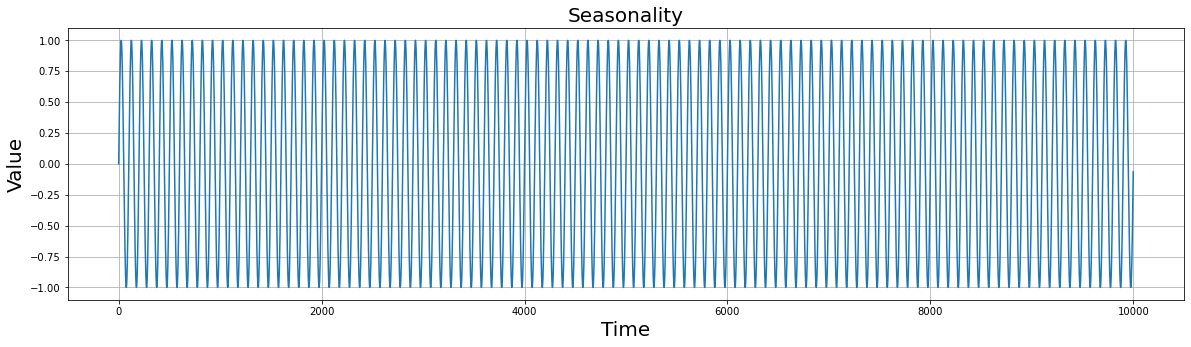

In [22]:
# Just a sin curve
values = [np.sin(x / period * 2 * np.pi) for x in range(period)]
# Repeat the pattern
seasonal = []
for i in range(repeat):
    for j in range(period):
        seasonal.append(values[j])
seasonal = np.array(seasonal)

# Plot
time_seasonal = np.arange(period * repeat)
plot_time_series(time_seasonal, seasonal, label="Seasonality")

holiday interval std: 223.83513076428574


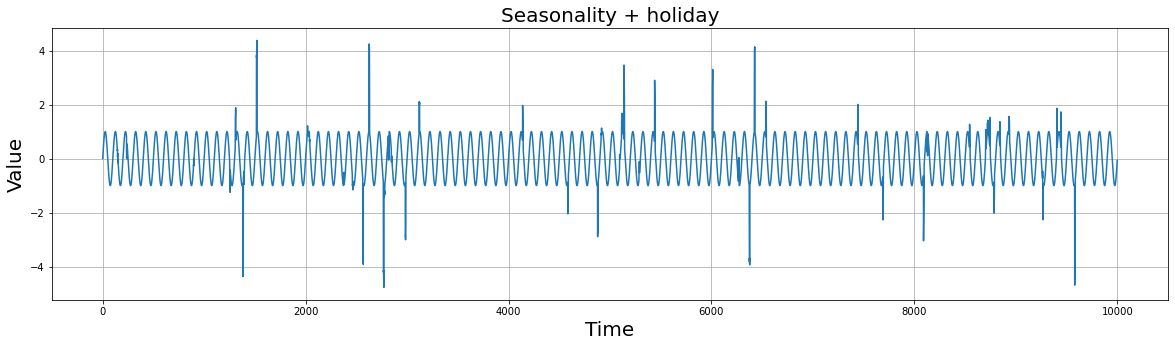

In [16]:
N = period * repeat
H = int(N * rate)

p = np.random.rand(N, )
p = p / p.sum()

for i in range(10):
    start = np.random.randint(N)
    end = int(start + N / 10)
    p[start: end] = sorted(p[start: end])

holiday = np.random.choice(N, H, replace=False, p=p)
holiday.sort()
print(f'holiday interval std: {np.diff(holiday).std()}')
holiday_factor = np.random.rand(H) * scale

seasonal_holiday = seasonal.copy()
for h, hf in zip(holiday, holiday_factor):
    seasonal_holiday[h + 1:h + effect + 1] = seasonal[h + 1:h + effect + 1] * hf + np.random.randn(effect) * 0.1

plot_time_series(time_seasonal, seasonal_holiday, label="Seasonality + holiday")

In [17]:
holi = np.ones_like(seasonal_holiday)
holi[holiday] = holiday_factor

In [18]:
data_dir = f'../data/sin_mul_rate-{rate}_scale-{scale}_effect-{effect}/'
if not os.path.exists(data_dir):
    os.mkdir(data_dir)
np.save(data_dir + 'without_holiday', seasonal)
np.save(data_dir + 'with_holiday', seasonal_holiday)
np.save(data_dir + 'holiday', holi)

In [19]:
data_dir

'../data/sin_mul_rate-0.005_scale-5.0_effect-5/'